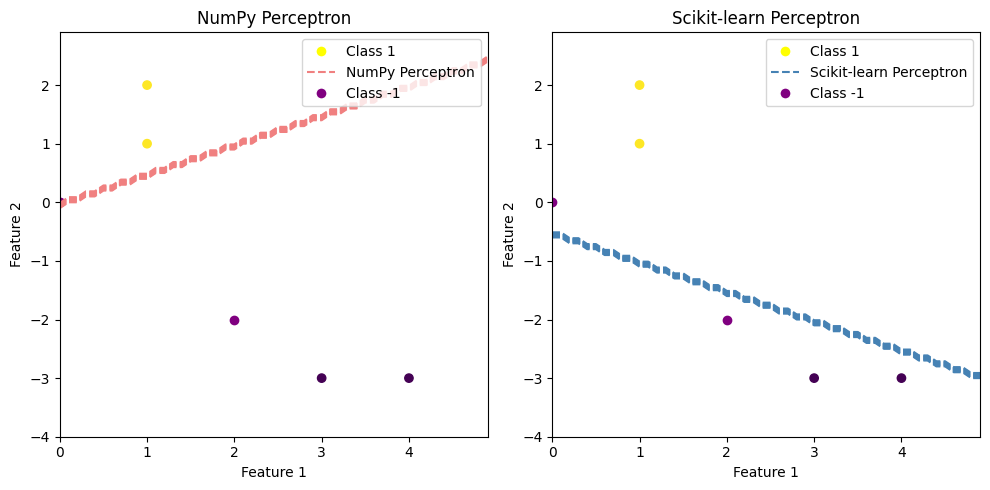

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# 创建数据
samples = np.array([[3, -3], [4, -3], [1, 1], [1, 2]])
labels = np.array([-1, -1, 1, 1])

# 使用NumPy实现感知器
class NumpyPerceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, sample):
        activation = np.dot(sample, self.weights) + self.bias
        return np.sign(activation)

    def train(self, samples, labels, num_epochs=10, learning_rate=1):
        for epoch in range(num_epochs):
            for sample, label in zip(samples, labels):
                prediction = self.predict(sample)
                if prediction != label:
                    self.weights += learning_rate * label * sample
                    self.bias += learning_rate * label

# 使用NumPy实现感知器进行训练
numpy_perceptron = NumpyPerceptron(num_features=samples.shape[1])
numpy_perceptron.train(samples, labels)

# 使用Scikit-learn的Perceptron进行训练
sklearn_perceptron = Perceptron()
sklearn_perceptron.fit(samples, labels)

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 绘制数据点和决策边界（NumPy感知器）
scatter = ax1.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis', label='Class 1')

x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z_numpy = numpy_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numpy = Z_numpy.reshape(xx.shape)
contour = ax1.contour(xx, yy, Z_numpy, colors='lightcoral', linestyles='dashed', label='NumPy Perceptron')

# 绘制紫色数据点和图例
additional_samples = np.array([[2, -2], [0, 0]])  # 添加两个紫色数据点
scatter_additional1 = ax1.scatter(additional_samples[:, 0], additional_samples[:, 1], c='purple', label='Class -1')

# 创建图例元素并关联标签（左边图）
legend_elements1 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Class 1'),
                   plt.Line2D([0], [0], linestyle='dashed', color='lightcoral', label='NumPy Perceptron'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='Class -1')]

ax1.legend(handles=legend_elements1, loc='upper right')

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('NumPy Perceptron')

# 绘制数据点和决策边界（Scikit-learn感知器）
scatter = ax2.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis', label='Class 1')

Z_sklearn = sklearn_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)
ax2.contour(xx, yy, Z_sklearn, colors='steelblue', linestyles='dashed',label='Scikit-learn Perceptron')

# 绘制紫色数据点和图例
scatter_additional2 = ax2.scatter(additional_samples[:, 0], additional_samples[:, 1], c='purple', label='Class -1')

# 创建图例元素并关联标签（右边图）
legend_elements2 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Class 1'),
                   plt.Line2D([0], [0], linestyle='dashed', color='steelblue', label='Scikit-learn Perceptron'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='Class -1')]

ax2.legend(handles=legend_elements2, loc='upper right')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Scikit-learn Perceptron')

# 调整子图间的间距
plt.tight_layout()

# 显示图形
plt.show()